In [1]:
import os
import pandas as pd
import re
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.stem import WordNetLemmatizer
from gensim.models.phrases import Phrases, Phraser
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np




# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /Users/asa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/asa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/asa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/asa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/asa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/asa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Setup
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
custom_stopwords = set(['older', 'people', 'adults','like','make','help','kentucky','members','use','users','user','world','aging','using','seniors','senior','age','product','products','new','year','years','000','provide','provides','based','team','way', 'we','are','we_are','nan','nan_nan','tc', 'pineway','medly','enables','ehr','northwest', 'without', 'balloon','face','Other','stakeholder', 'dml','which_allows','qura','._','africa','will_allow','cisco','\'ll','ranging_from','avizia','whose_mission','--','ehrs','zorpia','hellocare','//care.coach','karie','byenbye','cost_to','binata','inc.','etc','2_)','1_)','\'_s','80%_%','20%_%','those_who','llc','we_offer','inclue','others','list','top','yet','NOVELTY','e.g','1-3','12a','cam','mpu6050','cic'])
sw = stop_words | custom_stopwords
punctuation = re.compile(r'[^\w\s]')  
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word, tag):
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}
    return tag_dict.get(tag[0].upper(), nltk.corpus.wordnet.NOUN)

# Preprocessing Function
def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text.lower())
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token, tag)) for token, tag in tagged_tokens if token not in sw and not punctuation.search(token) and not token.isdigit() and len(token) > 1]
    return lemmatized_tokens

# Function to extract text between "NOVELTY" and "USE"
def extract_text(text):
    start = text.find("NOVELTY") + len("NOVELTY - ")
    end = text.find("USE -")
    return text[start:end].strip() if start > len("NOVELTY - ") and end != -1 else ''

# Reading the CSV files
df1 = pd.read_csv('/Users/asa/VScode/patent/company_wos.csv')
df2 = pd.read_csv('/Users/asa/VScode/patent/patent_wos.csv')

# Adding extracted text column
df1['extracted_text'] = df1[' AB '].astype(str).apply(extract_text)
df2['extracted_text'] = df2[' AB '].astype(str).apply(extract_text)

# Concatenating title and abstract columns
df1['text'] = df1[[' TI ','extracted_text']].astype(str).agg(' '.join, axis=1)
df2['text'] = df2[[' TI ','extracted_text']].astype(str).agg(' '.join, axis=1)

# Assigning additional columns
df1['assignee'] = df1[' AE ']
df2['assignee'] = df2[' AE ']
df1['patent number'] = df1['PN ']
df2['patent number'] = df2['PN ']
df1['dc'] = df1[' DC ']
df2['dc'] = df2[' DC ']

# Selecting required columns
temp_df1 = df1[['text', 'assignee', 'patent number', 'dc']]
temp_df2 = df2[['text', 'assignee', 'patent number', 'dc']]

# Combining dataframes
combined_df = pd.concat([temp_df1, temp_df2], ignore_index=True)

# Optionally save the combined DataFrame to a new CSV file
# combined_df.to_csv('/Users/asa/VScode/patent/novelty_patents.csv', index=False)


# combined_df.dropna(subset=['text'], inplace=True)# Cleaning and preprocessing text data
# combined_df['text'] = combined_df['text'].replace(r'\n', ' ', regex=True).replace('nan', '', regex=True)
# combined_df['tokens'] = combined_df['text'].apply(preprocess)

# # Filtering based on token count
# filtered_df = combined_df[combined_df['tokens'].apply(len) >= 5]
# print(filtered_df.shape)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/asa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/asa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from keybert import KeyBERT
from keyphrase_vectorizers import KeyphraseCountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from transformers import AutoTokenizer, AutoModel

# Load the pre-trained BERT model
model_name = "allenai/scibert_scivocab_uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
kw_model = KeyBERT(model=model)

# Define patterns to remove
patterns = [
    r'\belderly\w*',     # Matches any word starting with "elderly"
    r'\bsenior\w*',     # Matches any word starting with "senior"
    r'\bag\w*',  
    r'\bolder\w*', 
    r'\belderly people\b', 
    r'\bnan\b',  # Ensure 'nan' is a complete word
    r'\baged persons\b', 
    r'\bage\b', 
    r'\baged people\b', 
]

# Apply regex substitutions to remove specified patterns
for i, row in combined_df.iterrows():
    text = row['text']
    # Apply all patterns to the text
    for pattern in patterns:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    
    # Update the 'text' column with the cleaned text
    combined_df.at[i, 'text'] = text

/opt/miniconda3/envs/glove_kmeans/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/miniconda3/envs/glove_kmeans/lib/python3.8/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/opt/miniconda3/envs/glove_kmeans/lib/python3.8/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/opt/miniconda3/envs/glove_kmeans/lib/python3.8/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.r

# Keybert

In [21]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Assuming 'kw_model' and 'KeyphraseCountVectorizer' are defined elsewhere
vectorizer = KeyphraseCountVectorizer()

def extract_and_print_keywords(text, excluded_words={'method'}):
    # Tokenize the input text
    tokens = tokenizer.tokenize(text)

    # Remove excluded words from tokens
    tokens = [token for token in tokens if token.lower() not in excluded_words]

    # Convert list of tokens back to a single string if not empty
    text_for_kw_extraction = ' '.join(tokens) if tokens else ''

    if text_for_kw_extraction.strip():
        keywords = kw_model.extract_keywords(text_for_kw_extraction, vectorizer=vectorizer, stop_words='english', use_mmr=True, top_n=3)
        keywords = [kw for kw in keywords if kw[0].lower() not in excluded_words]  # Additional filtering after extraction
        if keywords:
            print(f"Keywords for this text: {', '.join([kw[0] for kw in keywords])}")
            return [kw[0] for kw in keywords]
        else:
            print("No keywords extracted.")
            return []
    else:
        print("Skipping empty or invalid text.")
        return []

# Apply the function and clean the DataFrame
combined_df['keywords'] = combined_df['text'].apply(extract_and_print_keywords)
combined_df['keywords'] = combined_df['keywords'].apply(lambda kws: [kw for kw in kws if str(kw).lower() != 'nan'])

# Filter rows to keep only those with at least 4 keywords
filtered_df = combined_df[combined_df['keywords'].apply(len) >= 3]

# Save the updated DataFrame
filtered_df.to_csv('filtered_keywords.csv', index=False)


Keywords for this text: first artificial neural network model, processing element pe, base layer
Keywords for this text: multiple processing elements pes comprise, neural processing unit, instantaneous power consumption
Keywords for this text: electronic device, signal generator, neural processing unit npu
Keywords for this text: neural processing unit, decodes data, bitstream
Keywords for this text: neural processing unit npu 100a, processing element pe, bitstream
Keywords for this text: multimedia presentation, s200 multimedia data, laptop
Keywords for this text: analyte concentration sensor, time calibration, drift
Keywords for this text: transfer device, second longitudinal end, livestock
Keywords for this text: artificial neural network ann, optimal design, second operation unit
Keywords for this text: user cohort engagement outcomes, data analytics platform dap, communication configurations
Keywords for this text: neural processing unit, electronic apparatus, second blocks
Keywor

In [25]:
from tqdm.auto import tqdm
import torch
tokenizer = AutoTokenizer.from_pretrained(model_name)


def get_keyword_embeddings(keywords):
    keyword_embeddings = []
    for keyword in tqdm(keywords, desc="Computing keyword embeddings"):
        tokenized_keyword = tokenizer.encode(keyword, add_special_tokens=True)
        with torch.no_grad():  # Temporarily disable gradients
            keyword_embedding = model(torch.tensor([tokenized_keyword]))[0].mean(dim=1).squeeze()
        keyword_embeddings.append(keyword_embedding.numpy())  # Convert the detached tensor to a NumPy array
    return np.array(keyword_embeddings)

filtered_df['keyword_embeddings'] = filtered_df['keywords'].apply(lambda x: get_keyword_embeddings(x))
# Filter out rows where 'keyword_embeddings' is an empty list or None
filtered_df = filtered_df[filtered_df['keyword_embeddings'].apply(lambda x: x is not None and len(x) > 0)]

Computing keyword embeddings: 100%|██████████| 3/3 [00:00<00:00, 34.17it/s]
/var/folders/hp/05917n5s6yx4hqjk7gfgdw1r0000gn/T/ipykernel_14447/1207503117.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['keyword_embeddings'] = filtered_df['keywords'].apply(lambda x: get_keyword_embeddings(x))


# Concat

In [26]:
print(filtered_df['keyword_embeddings'][1].shape)

def concatenate_vectors(embeddings):
    # Concatenate the vectors along the last axis (axis=-1)
    return np.concatenate(embeddings, axis=-1)

# Apply the function to concatenate vectors for each row
filtered_df['concatenated_keyword_vectors'] = filtered_df['keyword_embeddings'].apply(concatenate_vectors)
print(filtered_df['concatenated_keyword_vectors'][100].shape)

(3, 768)
(2304,)


In [27]:
import pandas as pd

def find_non_3840_vectors(dataframe, column_name):
    # 存储不是3840维的行索引
    non_3840_indices = []
    
    # 遍历DataFrame中的每一行
    for index, row in dataframe.iterrows():
        vector = row[column_name]
        if len(vector) != 2304:
            non_3840_indices.append(index)
    
    # 返回不符合维度的行的索引和数量
    return non_3840_indices, len(non_3840_indices)

# 假设 filtered_df 是你的 DataFrame，并且 'concatenated_keyword_vectors' 是包含向量的列名
non_3840_indices, non_3840_count = find_non_3840_vectors(filtered_df, 'concatenated_keyword_vectors')

print("不是3840维的向量的行索引:", non_3840_indices)
print("不是3840维的向量的数量:", non_3840_count)

不是3840维的向量的行索引: []
不是3840维的向量的数量: 0


# Average Word Embeddings

In [28]:
import numpy as np

print(filtered_df['keyword_embeddings'][1].shape)

def average_vectors(embeddings):
    # Compute the mean of the vectors along the first axis (axis=0)
    # This assumes that 'embeddings' is a list of vectors for each keyword
    return np.mean(embeddings, axis=0)

# Apply the function to average vectors for each row
filtered_df['averaged_keyword_vectors'] = filtered_df['keyword_embeddings'].apply(average_vectors)
print(filtered_df['averaged_keyword_vectors'][100].shape)

(3, 768)
(768,)


# PCA

In [54]:
from sklearn.preprocessing import StandardScaler

vectors = np.stack(filtered_df['averaged_keyword_vectors'])

# 数据标准化，确保每个特征的平均值为0，方差为1
scaler = StandardScaler()
vectors_scaled = scaler.fit_transform(vectors)

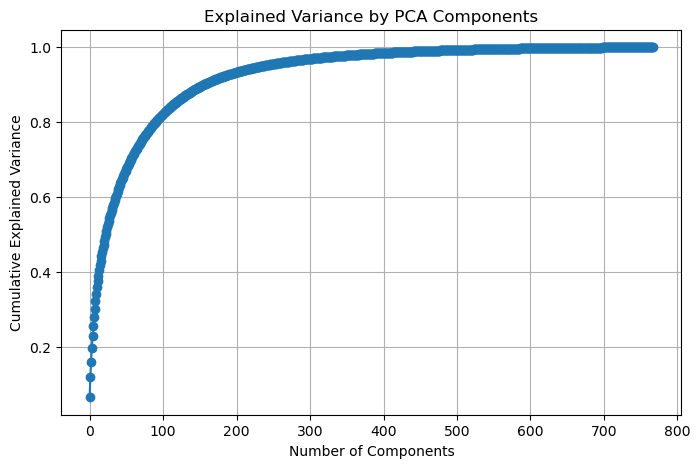

Number of components to retain: 237


In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(vectors_scaled)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting the cumulative explained variance to find the optimal number of components
plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Decide on a threshold for cumulative explained variance, e.g., 0.95
n_components = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
print(f'Number of components to retain: {n_components}')

# Initialize PCA with the number of components found
pca = PCA(n_components=n_components)
vectors_pca = pca.fit_transform(vectors_scaled)

# K-means

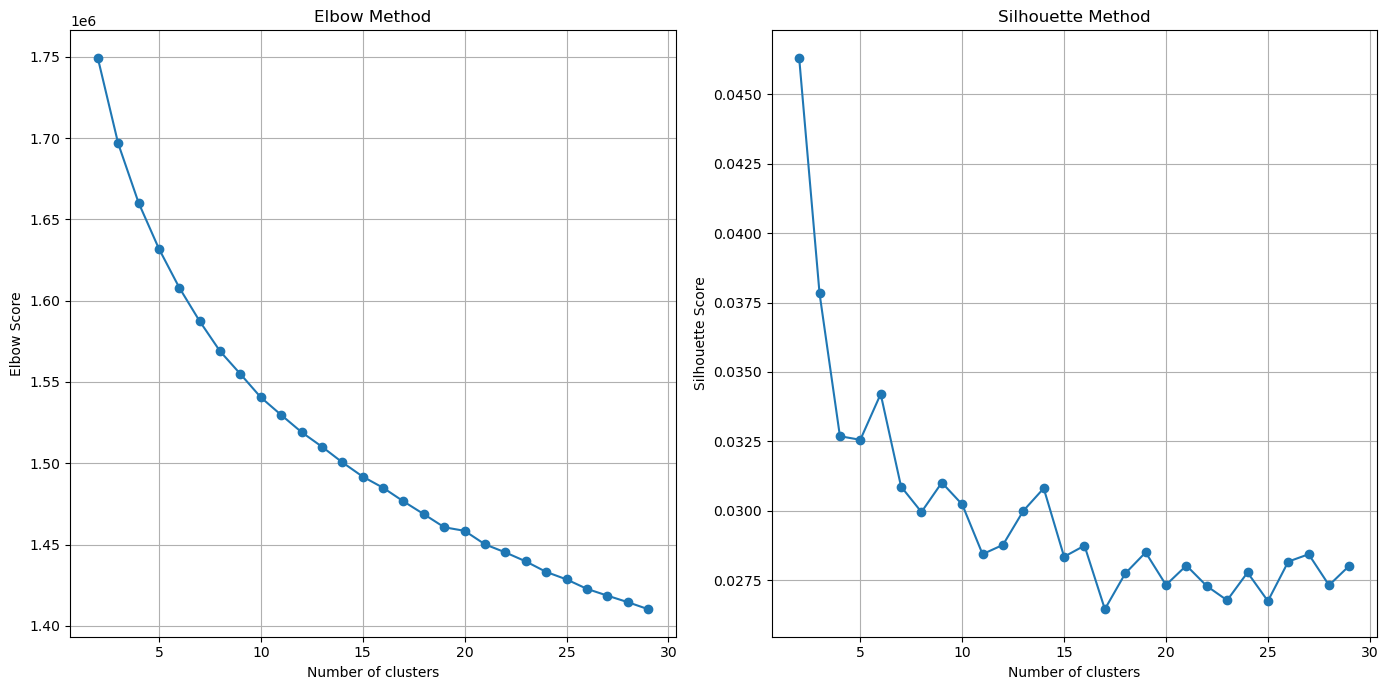

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []

# 定义聚类数的范围
range_of_clusters = range(2, 30)

for n_clusters in range_of_clusters:
    try:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(vectors_pca)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(vectors_pca, kmeans.labels_))
    except Exception as e:
        print(f"Error occurred for n_clusters={n_clusters}: {e}")
        continue

# 绘制图表
def plot_clusters(range_of_clusters, metric_values, metric_name):
    plt.plot(range_of_clusters, metric_values, marker='o')
    plt.title(f'{metric_name} Method')
    plt.xlabel('Number of clusters')
    plt.ylabel(f'{metric_name} Score')
    plt.grid(True)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plot_clusters(range_of_clusters, inertia, 'Elbow')
plt.subplot(1, 2, 2)
plot_clusters(range_of_clusters, silhouette_scores, ' ')

plt.tight_layout()
plt.show()

In [51]:
# Choose the number of clusters
num_clusters = 27  # Adjust based on your needs

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors_pca)
# Assign the cluster labels to your original DataFrame
filtered_df['cluster'] = kmeans.labels_


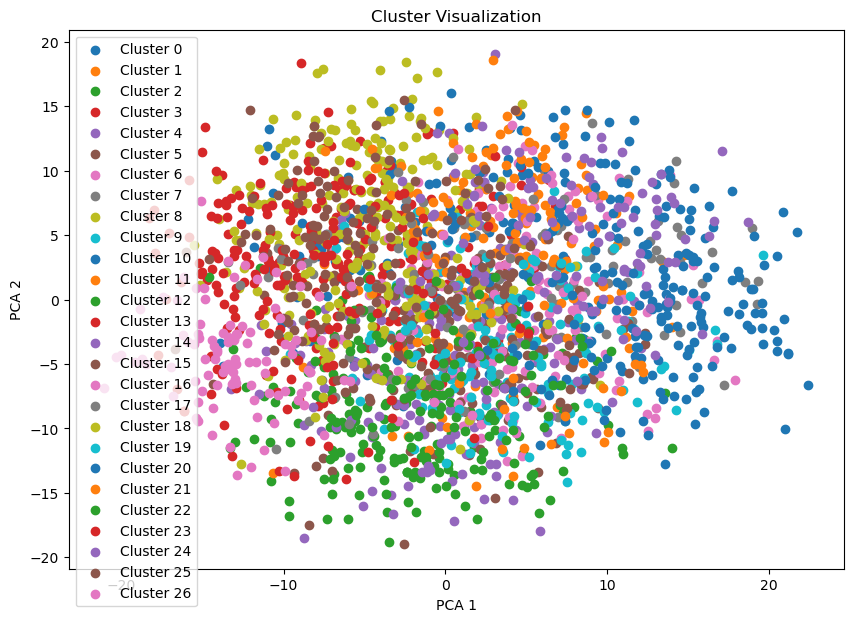

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors_pca)

# Plot the clusters
plt.figure(figsize=(10, 7))
for i in range(num_clusters):
    plt.scatter(reduced_vectors[kmeans.labels_ == i, 0], reduced_vectors[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.legend()
plt.title('Cluster Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [53]:
import pandas as pd

# Assume 'combined_df' is your DataFrame containing the documents
# Assign cluster labels to each document based on the cluster assignments
filtered_df['cluster_label'] = kmeans.labels_

# Save the DataFrame to a CSV file
filtered_df.to_csv('label27_cat_pca_patent.csv', index=False)

print("Cluster labels added and saved to CSV file.")


Cluster labels added and saved to CSV file.
